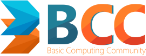

Untuk workshop *machine learning* ini, sebagian besar merujuk pada library scikit-learn, yang saat ini merupakan salah satu library machine learning open source yang paling populer dan mudah digunakan.

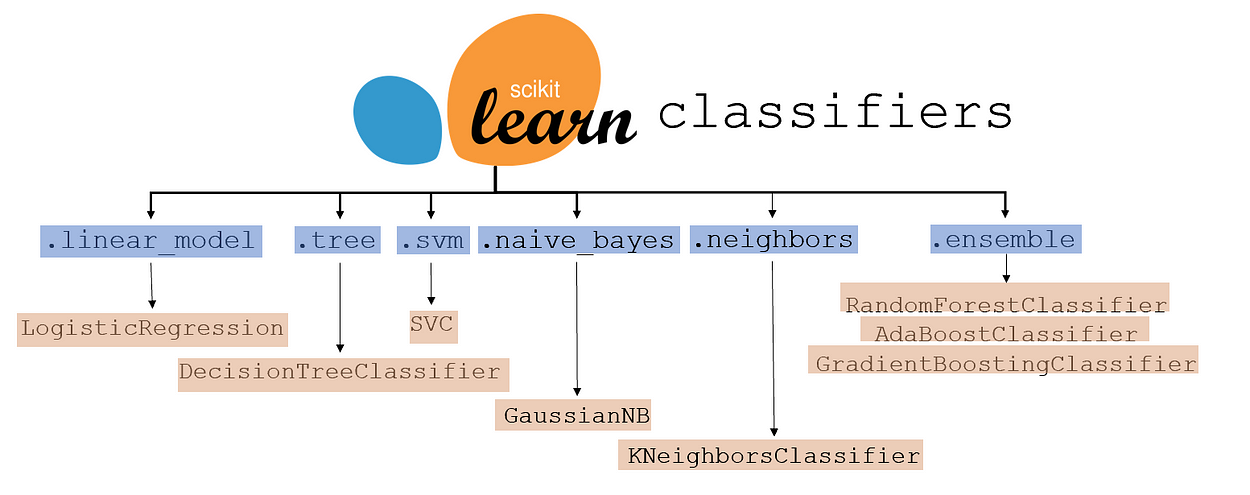

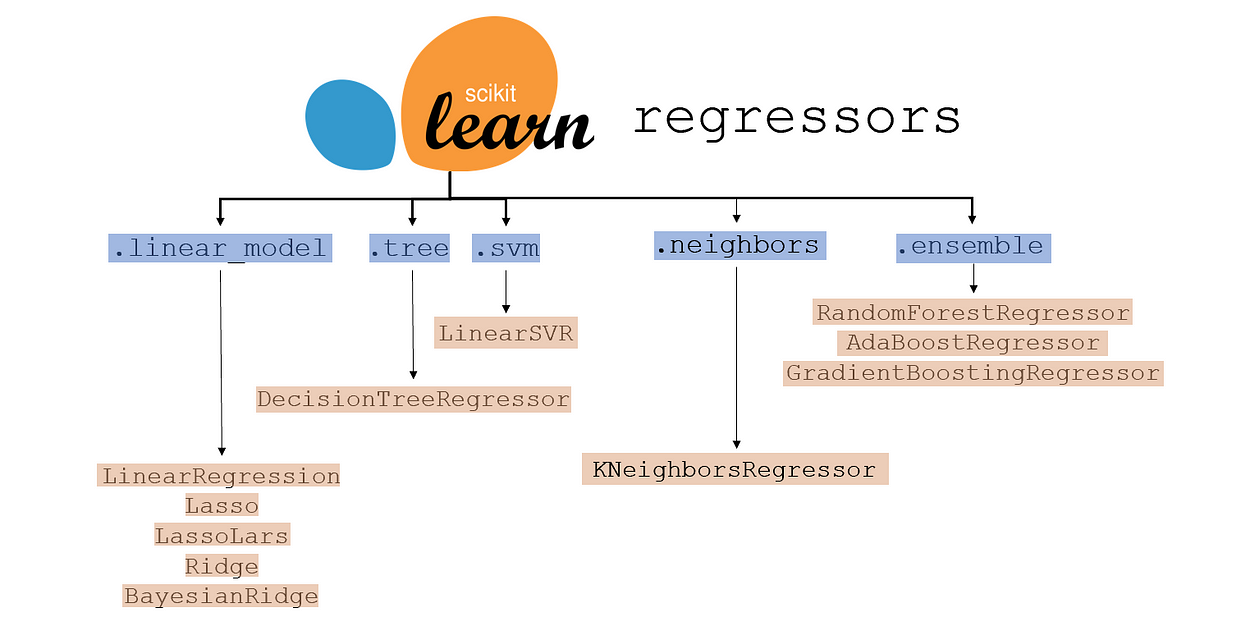

Terdapat beberapa library machine learning lain seperti `XGBoost`, `CatBoost`, `LightGBM`. Itu secara overall cara interface di pythonnya sama kayak scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the version
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')

pandas: 2.2.0
numpy: 1.26.3


Versi yang aku pakai di Jupyter Lab:
- pandas = 2.2.0
- numpy = 1.26.3

Berbeda dengan library seperti pandas dan numpy yang kita langsung import secara keseluruhan. `sklearn` perlu di import per module yang akan digunakan.

In [2]:
# Contoh
from sklearn.linear_model import LinearRegression

# Brief introduction to our dataset

## Medical Expenses

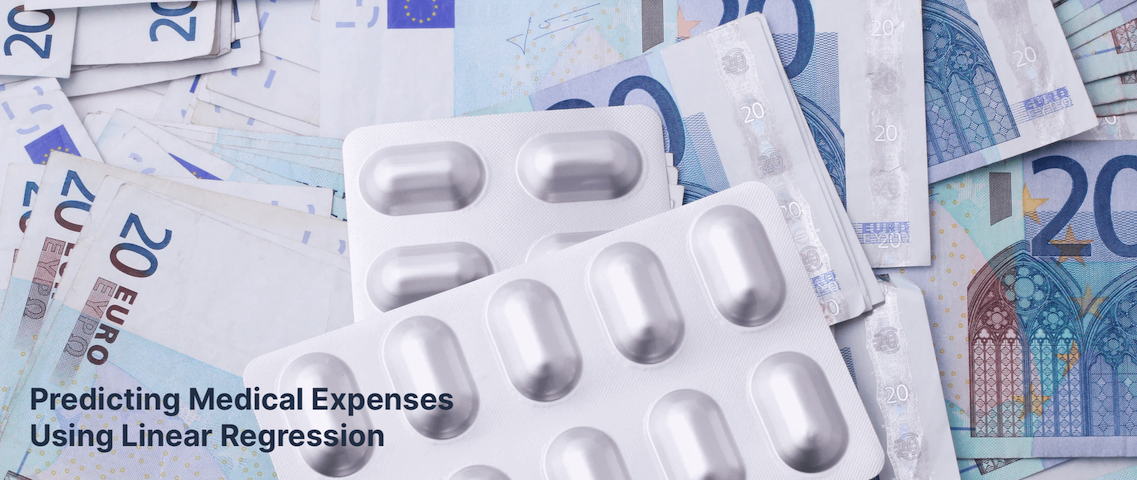

### Problem Statement (Khusus Task Regresi)

Perusahaan asuransi *LongLive* menawarkan asuransi kesehatan yang terjangkau kepada ribuan pelanggan di seluruh Indonesia. Sebagai data scientist di *LongLive*, **kamu ditugaskan untuk membuat sistem otomatis untuk memperkirakan pengeluaran medis bagi pelanggan baru yang tidak merokok**, dengan menggunakan informasi seperti age, sex, bmi, jumlah anak, dan wilayah tempat tinggal.

Estimasi dari sistemmu akan digunakan untuk menentukan premi asuransi (jumlah yang dibayar setiap bulan) yang ditawarkan kepada pelanggan.

Kamu akan diberikan file CSV yang berisi data historis yang terverifikasi.

csv file: https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv

* Ini adalah contoh dari masalah ML di mana kamu ingin menggantikan pengambilan keputusan manual **atau** menggabungkan proses pengambilan keputusan manual dengan otomatisasi.

In [3]:
# Load the medical expenses dataset
medical = pd.read_csv(
    "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv",
)
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


(Notes) Ini preprocessing yg simple, untuk processing yang detail bisa liat notebook Workshop 3A.

In [4]:
# Method for preprocessing
def prep(df):

  # Convert kategorikal ke variabel indikator
  df_dummies_sex = pd.get_dummies(df['sex'], prefix='gender')
  df_dummies_reg = pd.get_dummies(df['region'])
  df['smoker'] = pd.get_dummies(df['smoker'], drop_first=True)

  # Menggabungkan DataFrame asli dengan DataFrame hasil get_dummies
  df = pd.concat([df, df_dummies_sex, df_dummies_reg], axis=1)

  # Hapus kolom yang sudah di convert
  df.drop(columns=['sex', 'region'], axis=1, inplace=True)

  return df

In [5]:
medical = prep(medical)
medical

,age,bmi,children,smoker,charges,gender_female,gender_male,northeast,northwest,southeast,southwest
0,19,27.900,0,True,16884.92400,True,False,False,False,False,True
1,18,33.770,1,False,1725.55230,False,True,False,False,True,False
2,28,33.000,3,False,4449.46200,False,True,False,False,True,False
3,33,22.705,0,False,21984.47061,False,True,False,True,False,False
4,32,28.880,0,False,3866.85520,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,10600.54830,False,True,False,True,False,False
1334,18,31.920,0,False,2205.98080,True,False,True,False,False,False
1335,18,36.850,0,False,1629.83350,True,False,False,False,True,False
1336,21,25.800,0,False,2007.94500,True,False,False,False,False,True


Karena dalam ML Fundamentals ini kita belajar Linear Regression dimana Linear Regression itu hanya menggunakan 1 variabel, maka kita akan coba pilih 1 variabel yaitu `age`.

Notes:
- Linear Regression memiliki banyak varian, antara lain Multiple Linear Regression.

In [6]:
# Kita ambil data histori pelangan yang tidak merokok
non_smoker_df = medical[medical.smoker == 0]

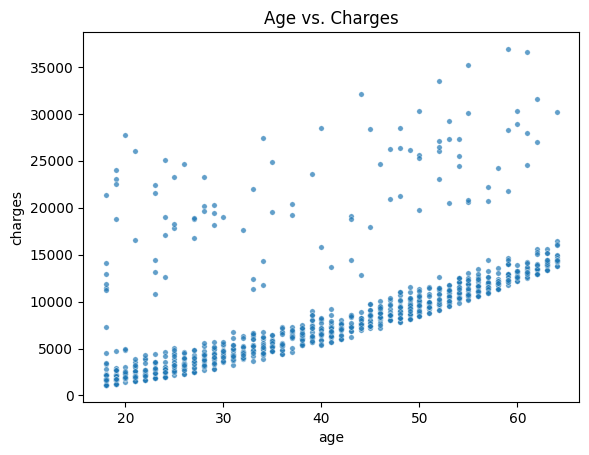

In [7]:
# Kita coba plot kolom `age` dan `charges`
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [8]:
# Kita ambil 2 kolom yang relevant yaitu `age` dan `charges`
non_smoker_df = non_smoker_df[['age', 'charges']]

Setelah melihat dataset diatas, terdapat 2 hal yang perlu kita perhatikan.
- Manakah kolom yang menjadi fitur (X)?
- Manakah kolom yang menjadi target prediksi (y)?


Notes:
Dalam dunia machine learning *fitur* sering disebut `X` (huruf besar) dan *target prediksi* sebagai `y`.

### Answer:
- fitur (X) --> age
- target prediksi (y) --> charges

# Modeling - Regression

## Linear Regression

In [9]:
# Kita ambil fitur dan target yang sesuai
X = non_smoker_df.drop('charges', axis=1)
y = non_smoker_df['charges']

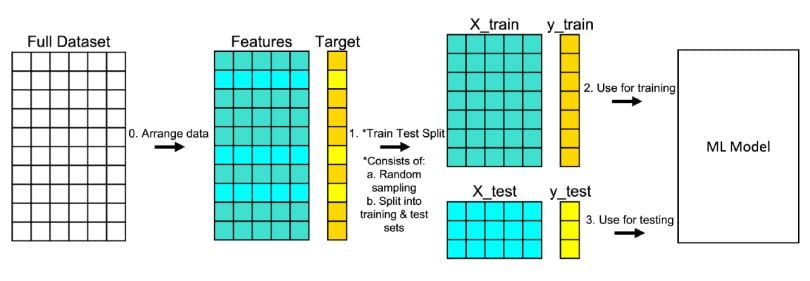

train-test split also known as *hold-out* method.

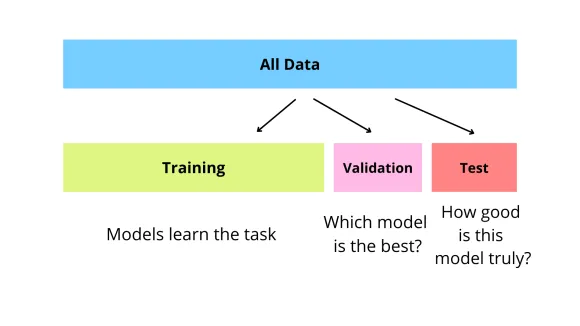

Mungkin ada beberapa orang yang pakai validation set (dalam konteks data split). Aku coba kutip dari beberapa sumber:

- Validation set digunakan untuk fitur selection (Molnar, 2022).
- Validation set digunakan untuk *model selection* (Model selection: estimating the performance of different models in order to choose the best one) (Hastie & Tibshirani, 2016).
- dll

In [10]:
from sklearn.model_selection import train_test_split

# Train & Test Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kita lakukan scaling dengan library StandardScaler terhadap fitur `age`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

Pastikan untuk melakukan perintah `train_test_split` sebelum melakukan scaling untuk menghindari *data leakage*.

Terdapat dua tipe Data Leakage , yaitu :

- Train-Test Contamination
- Target Leakage

## Train-Test Contamination

"Train-test contamination" adalah suatu kesalahan yang dapat terjadi dalam proses pengembangan model machine learning ketika data pengujian "terkontaminasi" atau terdapat informasi dari data pelatihan (train set). Hal ini dapat mengakibatkan model tampak lebih baik daripada yang seharusnya atau memberikan estimasi kinerja yang tidak akurat.

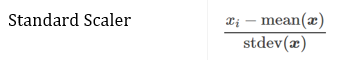

Proses scaling data yang dilakukan memiliki **pengetahuan tentang distribusi** data lengkap dalam dataset saat menghitung faktor penskalaan (seperti nilai minimum dan maksimum atau rata-rata dan deviasi standar).

Untuk menghindari itu maka kita "learning" faktor penskalaan setelah data dipisah, sehingga faktor penskalaan yang dipelajari oleh objek `scaler` itu cuman belajar dari data training.

## Target leakage

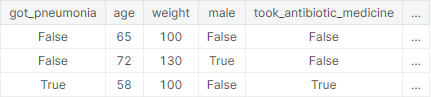

More about *data leakage* : https://machinelearningmastery.com/data-leakage-machine-learning/

Terdapat 2 method utama yang perlu kita perhatikan:
- `.fit()` : method ini digunakan untuk memberi perintah ke model untuk mengenal pola pada data yang diberikan (*training*)
- `.predict()` : method ini digunakan untuk memprediksi

In [11]:
from sklearn.linear_model import LinearRegression

# Buat object model
reg_linear = LinearRegression()

# Train the model
reg_linear.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# m / kemiringan
reg_linear.coef_

array([3715.66027886])

In [13]:
# c / konstanta
reg_linear.intercept_

8470.88426619154

Ingat karena kita melatih model `reg_linear` dengan fitur `X_train_scaled` (sudah dilakukan scaling), maka jika kita mau melakukan pengujian terhadap data test, maka kita juga perlu melakukan transformasi scaling terhadap data tersebut dengan nilai penskalaan dari data training.


In [14]:
X_test_scaled = scaler.transform(X_test)

y_pred = reg_linear.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred)
print(f"MSE Score: {score}")

MSE Score: 19603075.14431584


Untuk mempermudah kita dalam membandingkan beberapa performa algoritma, kita coba sajikan score dalam bentuk tabel.

In [16]:
# Buat DataFrame dengan nama reg_score dengan kolum "Model" dan "MSE"
reg_score = pd.DataFrame(columns=["Model", "MSE"])

new_row = {"Model": "Linear Regression", "MSE": score}
reg_score = pd.concat([reg_score, pd.DataFrame([new_row])], ignore_index=True)

# Untuk mengkonfigurasi agar tabel hanya menunjukkan 3 angka dibelakang koma
pd.options.display.float_format = '{:.3f}'.format

# Karena nilai MSE yang mendekati 0 itu semakin baik, maka kita beri parameter ascending=True untung mengurutkan
reg_score.sort_values(by="MSE", ascending=True)

C:\Users\PEW\AppData\Local\Temp\ipykernel_2448\1872307479.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reg_score = pd.concat([reg_score, pd.DataFrame([new_row])], ignore_index=True)


,Model,MSE
0,Linear Regression,19603075.144


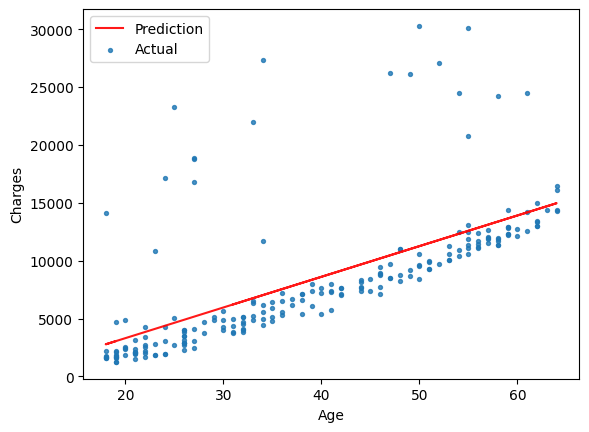

In [17]:
plt.plot(X_test, y_pred, 'r', alpha=0.9)
plt.scatter(X_test, y_test, s=8, alpha=0.8)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual'])

# Modeling - Classification

## KNN

In [18]:
medical.sample(3)

,age,bmi,children,smoker,charges,gender_female,gender_male,northeast,northwest,southeast,southwest
764,45,25.175,2,False,9095.068,True,False,True,False,False,False
290,28,33.400,0,False,3172.018,True,False,False,False,False,True
212,24,28.500,2,False,3537.703,False,True,False,True,False,False


In [19]:
X = medical[['age', 'bmi', 'children', 'charges']]
y = medical['smoker']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
y_pred = knn.predict(X_test)

### Confusion Matrix

Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual (binary class problem).

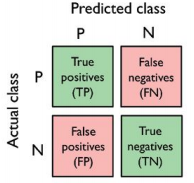

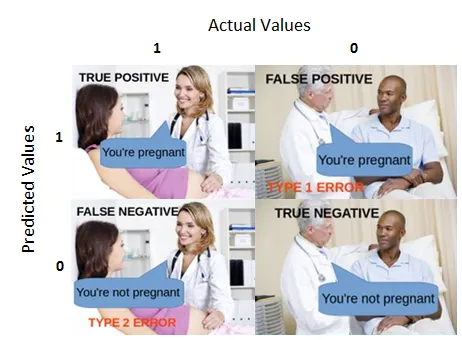

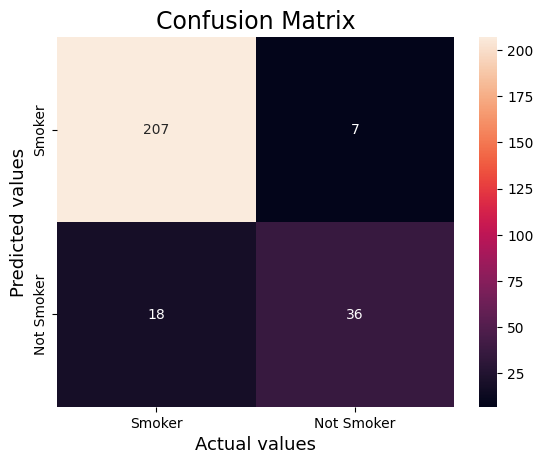

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Smoker','Not Smoker'],
            yticklabels=['Smoker','Not Smoker'])
plt.ylabel('Predicted values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.9067164179104478


In [25]:
class_score = pd.DataFrame(columns=["Model", "Accuracy"])

new_row = {"Model": "KNN", "Accuracy": score}
class_score = pd.concat([class_score, pd.DataFrame([new_row])], ignore_index=True)

pd.options.display.float_format = '{:.3f}'.format

# Karena nilai akurasi yang mendekati 1 itu semakin baik, maka kita beri parameter ascending=False
class_score.sort_values(by="Accuracy", ascending=False)

C:\Users\PEW\AppData\Local\Temp\ipykernel_2448\3339392058.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  class_score = pd.concat([class_score, pd.DataFrame([new_row])], ignore_index=True)


,Model,Accuracy
0,KNN,0.907


## (Bonus) Naive Bayes (Classification task)

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.9216417910447762


In [27]:
new_row = {"Model": "Naive Bayes", "Accuracy": score}
class_score = pd.concat([class_score, pd.DataFrame([new_row])], ignore_index=True)
class_score.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Naive Bayes,0.922
0,KNN,0.907


## (Bonus) Decision Tree (Classification task)

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.9664179104477612


In [29]:
new_row = {"Model": "Decision Tree", "Accuracy": score}
class_score = pd.concat([class_score, pd.DataFrame([new_row])], ignore_index=True)
class_score.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Decision Tree,0.966
1,Naive Bayes,0.922
0,KNN,0.907


# Modeling - Clustering

## K-MEANS

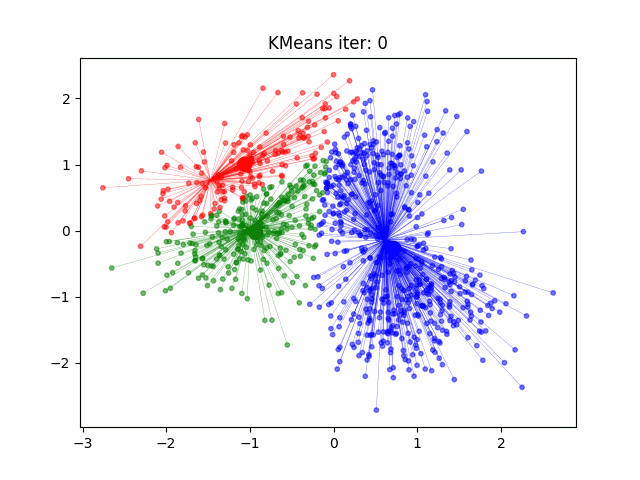

Although k-means clustering can be applied to data in higher dimensions, we will walk through the following examples using a simple two-dimensional dataset for the purpose of visualization:

In [30]:
X = medical[['age', 'charges']]

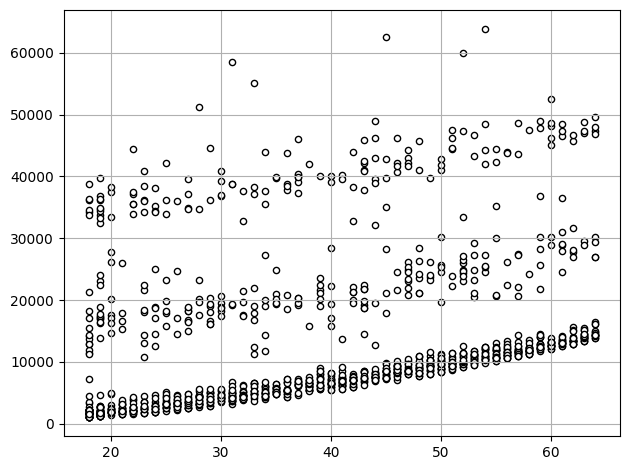

In [31]:
plt.scatter(X['age'],
            X['charges'],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.tight_layout()
plt.show()

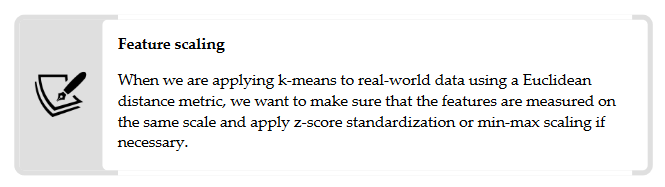

(Raschka & Mirjalili, 2019)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

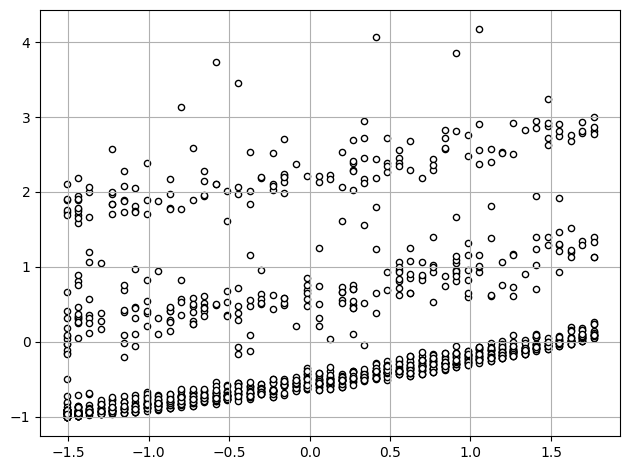

In [33]:
plt.scatter(X_scaled[:, 0],
            X_scaled[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
from sklearn.cluster import KMeans

# n_init : cara inisilisasi
km = KMeans(n_clusters=3, random_state=42, n_init="auto")
km.fit(X_scaled)

y_km = km.predict(X_scaled)

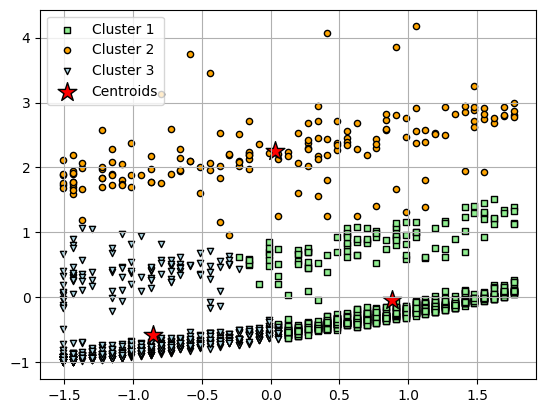

In [35]:
plt.scatter(X_scaled[y_km == 0, 0], 
            X_scaled[y_km == 0, 1],
            s=20, 
            c='lightgreen',
            marker='s', 
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X_scaled[y_km == 1, 0],
            X_scaled[y_km == 1, 1],
            s=20, c='orange',
            marker='o', 
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X_scaled[y_km == 2, 0],
            X_scaled[y_km == 2, 1],
            s=20, c='lightblue',
            marker='v', 
            edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red', 
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
score = silhouette_score(X_scaled, y_km)

clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

new_row = {"Model": "KNN", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=True)

C:\Users\PEW\AppData\Local\Temp\ipykernel_2448\1086443720.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)


,Model,Silhouette Score
0,KNN,0.524


More about Silhouette score: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

## (Bonus) AHC (Clustering task)

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=3)

# Fit model and predict clusters
y_pred = AC.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4546289756439967


In [40]:
new_row = {"Model": "AHC", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,KNN,0.524
1,AHC,0.455


# Fine-tuning machine learning models

Dalam machine learning ada dua jenis parameter (Raschka & Mirjalili, 2019):
- Parameter yang dipelajari dari data training, misal bobot dalam logistic regression.
- Parameter untuk training algorithm yang akan menentukan struktur dan perilaku machine learning itu sendiri. Parameter ini sering disebut sebagai *hyperparameter*.

Contoh hyperparameter itu seperti jumlah $k$ di algoritme KNN.

# Saving & opening your machine learning model

In [41]:
import pickle

# save the model to disk
filename = 'final_model.pkl'
pickle.dump(AC, open(filename, 'wb'))

In [42]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Coba prediksi
y_pred_loaded_model = loaded_model.fit_predict(X_scaled)
score = silhouette_score(X_scaled, y_pred_loaded_model)
score

0.4546289756439967

# Daftar Pustaka
- Molnar, C. (2022). Interpretable Machine Learning: A Guide For Making Black Box Models Explainable.
- Raschka, S., & Mirjalili, V. (2019). Python machine learning: Machine learning and deep learning with Python, scikit-learn, and TensorFlow 2 (Third edition). Packt.
- Hastie, T., & Tibshirani, R. (2016). The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2nd Edition.
- freeCodeCamp.org (Director). (2023, November 22). Machine Learning with Python and Scikit-Learn – Full Course. https://www.youtube.com/watch?v=hDKCxebp88A